In [67]:
import numpy as np
import pandas as pd

In [68]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Unnamed: 0,neigborhood_cat,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price
0,34881,High,Entire home/apt,0.000890,0.014899,0.008184,0.088028,0.000000,0.000000,0.251162,0.056122
1,9929,Low,Entire home/apt,0.003559,0.004382,0.001169,0.000000,0.000000,0.000000,0.330888,0.016327
2,60478,High,Entire home/apt,0.000000,0.000000,0.019665,0.176056,0.964384,0.000000,0.097945,0.269388
3,38620,High,Entire home/apt,0.000000,0.001753,0.003118,0.228873,0.646575,0.003030,0.016141,0.694898
4,1009,Middle,Entire home/apt,0.000000,0.066608,0.019291,0.066901,0.731507,0.022727,0.010271,0.086735


In [4]:
train = train.iloc[:,1:]

In [5]:
val = pd.read_csv('val.csv')

In [6]:
val = val.iloc[:,1:]

In [7]:
train = pd.concat([train,val], ignore_index = True)

In [8]:
train.columns

Index(['neigborhood_cat', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'days_since_last_review',
       'price'],
      dtype='object')

In [9]:
cat = [0,1]
num = [2,3,4,5,6,7,8,9]

In [10]:
import random
random.seed(10)

In [49]:
n = len(train)

In [60]:
n

40554

In [118]:
np.shape(x2)

(40554,)

In [13]:
idx = random.choices(train.index, k = 3)
centroids_i = train.iloc[idx, ]
centroids_i

,neigborhood_cat,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price
30896,Middle,Entire home/apt,0.00089,0.031551,0.012471,0.0,0.000000,0.0,0.214233,0.036735
23190,Middle,Private room,0.00089,0.000000,0.016977,0.0,0.693151,0.0,0.147938,0.013265
31258,Mid-Low,Entire home/apt,0.00089,0.008764,0.004871,0.0,0.000000,0.0,0.260210,0.183673


In [12]:
def distance_matrix(data, centroids, k, alpha=0.5):
    # numerical values 
    n = len(data)
    d_num = np.zeros((n,k))
    for i in range(k):
        d_num[:,i] = np.sum((data.iloc[:,num].to_numpy()- centroids.iloc[:,num].to_numpy()[i])**2, 1)
        
    
    # categorical values
    d_cat = np.zeros((n,k))
    for i in range(n):
        for j in range(k):
            d_cat[i,j] = (data.iloc[i,1] != centroids.iloc[j,1]) + (data.iloc[i,2] != centroids.iloc[j,2])
                
    d = alpha * d_num + (1-alpha) * d_cat
        
    return(d)
            

In [14]:
dist = distance_matrix(train,centroids_i, 3)

In [15]:
dist

array([[0.00489211, 0.750499  , 0.01207436],
       [0.50744888, 0.75710704, 0.51652016],
       [1.01486492, 0.58633455, 0.99750239],
       ...,
       [0.02189181, 0.75142154, 0.0410735 ],
       [0.02927962, 0.73160367, 0.03239848],
       [1.00883582, 0.55550117, 1.00807927]])

In [54]:
def find_centroids(data, j, tol = 0.00001):
    # initialize random centroids
    random.seed(10)
    idx = random.choices(data.index, k = j)
    centroids = data.iloc[idx, :]
    
    dist_prev_iter = 1
    dist= 0
    iterations = 0
    
    while(dist_prev_iter - dist) > tol:
        dist_prev_iter = dist
        dist = 0
        n = len(data)
        cluster = np.zeros(n)
        
        d = distance_matrix(data, centroids, j)
        
        # assign cluster
        for i in range(n):
            cluster[i] = np.where(d[i] == d[i].min())[0][0]
            #print(cluster[i])
            
        cluster = cluster.astype(int)
            
        
        # sum distance to centroids
        for i in range(n):
            dist = dist + d[i, cluster[i]]
            
        
        # update centroid
        # for numerical features, update centroid with average value
        temp_num = pd.DataFrame(columns=data.columns[2:])
        for i in range(j):
            temp_num = temp_num.append(data[cluster == i].iloc[:, num].mean(axis = 0,skipna=True), ignore_index=True)
            
        #print(temp_num)
        
        temp_cat = pd.DataFrame(columns = data.columns[[0,1]])
        # for categorical features, update centroid with mode
        for i in range(j):
            temp_cat = temp_cat.append(data[cluster == i].mode(), ignore_index=True)
            
        #print(temp_cat)
       
        centroids = pd.concat([temp_cat, temp_num], axis = 1)
        #print(centroids)
        
        iterations += 1
        
    return centroids, dist

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
c3, d3 = find_centroids(train, 3)
c3

,neigborhood_cat,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price
0,High,Entire home/apt,0.00000,0.000000,0.019665,0.0,0.0,0.0,0.097945,0.132653,0.00459,0.012828,0.021518,0.039853,0.341737,0.00609,0.11088,0.171643
1,Middle,Private room,0.00000,0.000000,0.019291,0.0,0.0,0.0,0.001712,0.030612,0.002044,0.024879,0.022628,0.013835,0.35387,0.013008,0.094729,0.057675
2,Middle,Entire home/apt,0.00089,0.000876,0.000390,0.0,0.0,0.0,0.001712,0.081633,0.006327,0.010325,0.00884,0.034955,0.211589,0.003809,0.212024,0.134529


In [19]:
c4, d4 = find_centroids(train, 4)
d4

21681.76107513633

In [55]:
c6, d6 = find_centroids(train, 6)
d6

18707.5105697343

In [60]:
len(train.columns)

10

In [61]:
D = []
for i in range(1,20):
    c, d = find_centroids(train, i)
    D.append(d)

In [62]:
np.sqrt(D)

array([176.02696164, 155.90612774, 155.30394524, 151.68579698,
       138.24062861, 136.77540192, 135.25183313, 126.75374444,
       115.85027105, 110.87990089, 109.27961015, 104.90418418,
       101.92523583,  99.57377123,  99.41897389,  99.11367556,
        99.09905398,  98.08574123,  97.9253825 ])

Text(0, 0.5, 'Squared Root Distance')

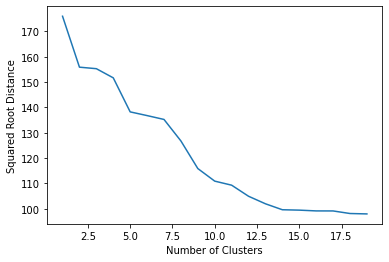

In [66]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,19,19), np.sqrt(D))
#plt.title('Squared Root Distance v.s. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Root Distance')

In [40]:
cluster = np.zeros(n)
        
d = distance_matrix(train, centroids, 5)
        
# assign cluster
for i in range(n):
    cluster[i] = np.where(d[i] == d[i].min())[0][0]
            #print(cluster[i])
            
cluster = cluster.astype(int)
dist = 0
for i in range(n):
    dist = dist + d[i, cluster[i]]

temp_num = pd.DataFrame(columns=train.columns[2:])
for i in range(5):
    temp_num = temp_num.append(train[cluster == i].iloc[:, num].mean(axis = 0,skipna=True), ignore_index=True)
    

temp_cat = pd.DataFrame(columns = train.columns[[0,1]])
        # for categorical features, update centroid with mode
for i in range(5):
    temp_cat = temp_cat.append(train[cluster == i].mode(), ignore_index=True)
    
centroids = pd.concat([temp_cat, temp_num], axis = 1)

In [41]:
dist

18024.96955128412

In [42]:
centroids

,neigborhood_cat,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price
0,High,Entire home/apt,0.000000,0.000000,0.019665,0.0,1.0,0.0,0.097945,0.081633,0.007874,0.016489,0.020714,0.047563,0.838565,0.009512,0.069333,0.180708
1,Middle,Private room,0.000000,0.000000,0.000195,0.0,0.0,0.0,0.211307,0.020408,0.003099,0.015773,0.015065,0.0088,0.159909,0.005863,0.240854,0.050318
2,High,Entire home/apt,0.001779,0.000000,0.019665,0.0,0.0,0.0,0.097945,0.081633,0.00337,0.008852,0.015856,0.037695,0.088567,0.003464,0.140519,0.157241
3,Middle,Entire home/apt,0.000890,0.000876,0.019291,0.0,0.0,0.0,0.001712,0.081633,0.002731,0.020254,0.020054,0.03434,0.212624,0.010827,0.08693,0.135244
4,High,Entire home/apt,0.003559,0.000000,0.000390,0.0,0.0,0.0,0.104072,0.081633,0.00973,0.008653,0.009823,0.045934,0.207848,0.003239,0.125209,0.177204


In [43]:
cluster = np.zeros(n)
        
d = distance_matrix(train, centroids, 5)
        
# assign cluster
for i in range(n):
    cluster[i] = np.where(d[i] == d[i].min())[0][0]
            #print(cluster[i])
            
cluster = cluster.astype(int)
dist = 0
for i in range(n):
    dist = dist + d[i, cluster[i]]

temp_num = pd.DataFrame(columns=train.columns[2:])
for i in range(5):
    temp_num = temp_num.append(train[cluster == i].iloc[:, num].mean(axis = 0,skipna=True), ignore_index=True)
    

temp_cat = pd.DataFrame(columns = train.columns[[0,1]])
        # for categorical features, update centroid with mode
for i in range(5):
    temp_cat = temp_cat.append(train[cluster == i].mode(), ignore_index=True)
    
centroids = pd.concat([temp_cat, temp_num], axis = 1)

In [44]:
dist

17231.604429038474

In [45]:
centroids

,neigborhood_cat,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,price
0,High,Entire home/apt,0.000000,0.000000,0.019665,0.0,1.0,0.0,0.097945,0.081633,0.007497,0.016406,0.021981,0.046917,0.730409,0.00973,0.069727,0.170977
1,Middle,Private room,0.000000,0.000000,0.000195,0.0,0.0,0.0,0.211307,0.020408,0.003077,0.01585,0.015119,0.008846,0.160943,0.005925,0.241184,0.051019
2,High,Entire home/apt,0.001779,0.000000,0.019665,0.0,0.0,0.0,0.097945,0.132653,0.003059,0.012073,0.016591,0.03746,0.243114,0.005647,0.118987,0.164148
3,Middle,Entire home/apt,0.000890,0.000876,0.019291,0.0,0.0,0.0,0.001712,0.081633,0.002948,0.019964,0.01869,0.034145,0.213799,0.010172,0.092763,0.132558
4,Middle,Entire home/apt,0.003559,0.000000,0.015985,0.0,0.0,0.0,0.157114,0.081633,0.009155,0.006621,0.011545,0.045013,0.182183,0.00239,0.137424,0.179941


In [46]:
cluster = np.zeros(n)
        
d = distance_matrix(train, centroids, 5)
        
# assign cluster
for i in range(n):
    cluster[i] = np.where(d[i] == d[i].min())[0][0]
            #print(cluster[i])
            
cluster = cluster.astype(int)
dist = 0
for i in range(n):
    dist = dist + d[i, cluster[i]]

temp_num = pd.DataFrame(columns=train.columns[2:])
for i in range(5):
    temp_num = temp_num.append(train[cluster == i].iloc[:, num].mean(axis = 0,skipna=True), ignore_index=True)
    

temp_cat = pd.DataFrame(columns = train.columns[[0,1]])
        # for categorical features, update centroid with mode
for i in range(5):
    temp_cat = temp_cat.append(train[cluster == i].mode(), ignore_index=True)
    
centroids = pd.concat([temp_cat, temp_num], axis = 1)

In [47]:
dist

17185.409085046827

In [50]:
# initialize random centroids
random.seed(10)
idx = random.choices(train.index, k = 5)
centroids = train.iloc[idx, :]

tol = 0.00001
dist_prev_iter = 0
dist= 1
iterations = 0
    
while(dist_prev_iter - dist) > tol:
    dist_prev_iter = dist
    dist = 0
    n = len(train)
    cluster = np.zeros(n)
        
    d = distance_matrix(train, centroids, 5)
        
        # assign cluster
    for i in range(n):
        cluster[i] = np.where(d[i] == d[i].min())[0][0]
        #print(cluster[i])
            
    cluster = cluster.astype(int)
            
        
        # sum distance to centroids
    for i in range(n):
        dist = dist + d[i, cluster[i]]
            
        
        # update centroid
        # for numerical features, update centroid with average value
    temp_num = pd.DataFrame(columns=train.columns[2:])
    for i in range(5):
        temp_num = temp_num.append(train[cluster == i].iloc[:, num].mean(axis = 0,skipna=True), ignore_index=True)
            
        #print(temp_num)
        
    temp_cat = pd.DataFrame(columns = train.columns[[0,1]])
        # for categorical features, update centroid with mode
    for i in range(5):
        temp_cat = temp_cat.append(train[cluster == i].mode(), ignore_index=True)
            
        #print(temp_cat)
       
    centroids = pd.concat([temp_cat, temp_num], axis = 1)
        #print(centroids)
        
    iterations += 1
        